In [1]:
# to reproduce older results (obtained before this package was created)
# https://arxiv.org/abs/1901.01615
from residuated_binars.constants import (
    ASSOCIATIVITY,
    LEFT_DISTRIBUTIVITY,
    NON_TRIVIAL_DISTRIBUTIVITY_LAWS,
    RESIDUATED_BINAR,
)
from residuated_binars.use_nitpick import use_nitpick

!rm -rf "./hyp*" "./task*"
use_nitpick(
    max_cardinality=5,
    independent_assumptions=NON_TRIVIAL_DISTRIBUTIVITY_LAWS,
    additional_assumptions=(
        RESIDUATED_BINAR +
        [
            ASSOCIATIVITY.replace("f(", "mult("),
            LEFT_DISTRIBUTIVITY.replace("f(", "meet(").replace("g(", "join(")
        ]
    ),
    check_subset_independence=True
)

In [2]:
# in this package we have also a parser for Isabelle server responses
from residuated_binars.parser import isabelle_response_to_algebra

binars = []
for i in range(2, 6):
    try:
        binars += isabelle_response_to_algebra(f"./task{i}/isabelle.out")
    except:
        pass

In [3]:
# maximal length of a label distinguishes the most general counter-example
max_label = max([len(binar.label) for binar in binars])
binars = [binar for binar in binars if len(binar.label) == max_label]
# we have 12 counter-examples, two per each A_1, A_2, ..., A_6
# from the paper
len(binars)

12

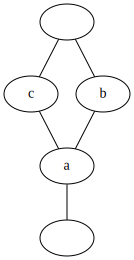

In [4]:
for binar in binars:
    binar.canonise_symbols()
binars[11].graphviz_repr

In [5]:
from IPython.display import Markdown

# it's important to notice that here we don't try to minimize the number of 
# different Hasse diagrams or Cayley tables, so all 12 binars are different
# some of them are isomorphic or have isomorphic lattice reducts
Markdown(binars[11].markdown_mult_table)

|*|⟘|a|b|c|⟙|
|-|-|-|-|-|-|
|**⟘**|⟘|⟘|⟘|⟘|⟘|
|**a**|⟘|⟘|⟘|⟘|⟘|
|**b**|⟘|⟘|b|⟘|b|
|**c**|⟘|⟘|⟘|c|c|
|**⟙**|⟘|⟘|b|c|⟙|


In [9]:
from residuated_binars.constants import BOUNDED_LATTICE, INVOLUTION
# to reproduce results obtained with this package
# https://arxiv.org/abs/2109.05264
# change `max_cardinality` to 10
# Attention! The computation might take a couple of days or weeks
# It's not recommended to run on a laptop
!rm -rf "./hyp*" "./task*"
use_nitpick(
    max_cardinality=2,
    independent_assumptions=NON_TRIVIAL_DISTRIBUTIVITY_LAWS,
    additional_assumptions=RESIDUATED_BINAR + BOUNDED_LATTICE + INVOLUTION,
    check_subset_independence=True,
)